# Proyek Klasifikasi Gambar: [Vegetable Image Dataset]
- **Nama:** Rebecca Olivia Javenka Br. Manurung
- **Email:** [rebeccaolivia1601@gmail.com]
- **ID Dicoding:** [rebeccaolivia]

## Import Semua Packages/Library yang Digunakan

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
import os

## Data Preparation

### Data Loading

In [2]:
import kagglehub

# Download dataset dari Kaggle
path = kagglehub.dataset_download("misrakahmed/vegetable-image-dataset")
print("Path to dataset files:", path)

# Path utama dataset
base_path = os.path.join(path, "Vegetable Images")

Path to dataset files: /kaggle/input/vegetable-image-dataset


In [3]:
# Load training data (tidak perlu validation_split karena sudah ada folder sendiri)
train_ds = image_dataset_from_directory(
    os.path.join(base_path, "train"),
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical'
)

# Load validation data
val_ds = image_dataset_from_directory(
    os.path.join(base_path, "validation"),
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical'
)

# Load test data
test_ds = image_dataset_from_directory(
    os.path.join(base_path, "test"),
    image_size=(224, 224),
    batch_size=32,
    shuffle=False,  # supaya urutan sama untuk evaluasi
    label_mode='categorical'
)

# Get class names BEFORE prefetching
class_names = train_ds.class_names
print("Kelas yang terdeteksi:", class_names)

Found 15000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.
Kelas yang terdeteksi: ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']


In [4]:
# Optimasi performa dengan prefetch

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

### Data Preprocessing

In [5]:
# Normalisasi pixel ke range [0,1]
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization

## Modelling

In [17]:
# Membangun model CNN
model = Sequential([
    # Conv block 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    # Conv block 2
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    # Conv block 3
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    # Fully connected
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(15, activation='softmax')  # 15 kelas sayuran
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# Compile model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 111, 111, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 54, 54, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 26, 26, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 15)             │         3,855 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,249,423 (84.87 MB)

 Trainable params: 22,248,975 (84.87 MB)

 Non-trainable params: 448 (1.75 KB)

Callbacks untuk early stopping dan learning rate reduction dan Training model


In [20]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Callbacks untuk early stopping dan learning rate reduction
early_stop = EarlyStopping(patience=5, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(patience=3, factor=0.5)

# Training model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=[early_stop, lr_reduce]
)

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 70ms/step - accuracy: 0.5285 - loss: 12.8819 - val_accuracy: 0.4593 - val_loss: 6.9778 - learning_rate: 0.0010
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 62ms/step - accuracy: 0.7555 - loss: 1.4986 - val_accuracy: 0.8047 - val_loss: 0.8402 - learning_rate: 0.0010
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 38s 55ms/step - accuracy: 0.8168 - loss: 0.8435 - val_accuracy: 0.8167 - val_loss: 1.4637 - learning_rate: 0.0010
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 62ms/step - accuracy: 0.8301 - loss: 0.7353 - val_accuracy: 0.8667 - val_loss: 0.9758 - learning_rate: 0.0010
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 38s 55ms/step - accuracy: 0.8347 - loss: 0.7055 - val_accuracy: 0.7313 - val_loss: 3.7563 - learning_rate: 0.0010
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step - accuracy: 0.8726 - loss: 0.5321 - val_accuracy: 0.9507 - val_loss: 0.2870 - learning_rate: 5.0000e-04
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 55ms/step - accuracy: 0.924

## Evaluasi dan Visualisasi

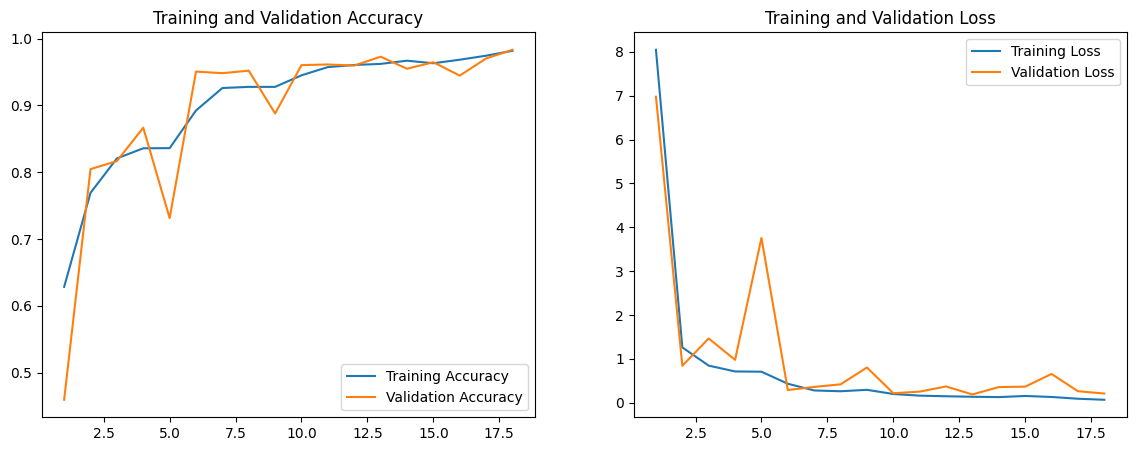

In [21]:
import matplotlib.pyplot as plt

# Ambil data history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(acc) + 1)

# Plot akurasi
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [22]:
# Evaluasi model pada test set
test_loss, test_acc = model.evaluate(test_ds)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.9781 - loss: 0.1788

Test Accuracy: 0.9697
Test Loss: 0.1913


## Konversi Model

### Simpan model dalam format SavedModel

In [38]:
saved_model_dir = 'saved_model_dir'
model.export(saved_model_dir)

Saved artifact at 'saved_model_dir'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_163')
Output Type:
  TensorSpec(shape=(None, 15), dtype=tf.float32, name=None)
Captures:
  138356594784784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138356594785360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138356594773648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138356594785552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138356594782672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138356594775376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138356594783824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138356594785936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138354346001040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138354346000656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1383565947

### Konversi ke TFLite


In [39]:
tflite_output_path = 'tflite/model.tflite'
label_output_path = 'tflite/label.txt'

os.makedirs(os.path.dirname(tflite_output_path), exist_ok=True)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

with open(tflite_output_path, 'wb') as f:
    f.write(tflite_model)

### Konversi ke TensorFlow.js

In [41]:
!pip install tensorflowjs
!tensorflowjs_converter \
    --input_format=tf_saved_model \
    --output_format=tfjs_graph_model \
    saved_model_dir \
tfjs_model

2025-05-21 14:41:58.637359: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747838518.660924   24410 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747838518.666749   24410 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
2025-05-21 14:42:02.715486: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I0000 00:00:1747838522.715671   24410 gpu_device.cc:2022] Created device /job:localhost/replica:0/task

## Inference (Optional)

In [52]:
# Mengeksplorasi struktur direktori dataset

import os

# Menetapkan path dasar dataset
base_path = '/kaggle/input'

# Menelusuri seluruh struktur folder dan mencetak path-nya
# Ini membantu memahami bagaimana dataset diorganisir
for root, dirs, files in os.walk(base_path):
    print(root)

/kaggle/input
/kaggle/input/vegetable-image-dataset
/kaggle/input/vegetable-image-dataset/Vegetable Images
/kaggle/input/vegetable-image-dataset/Vegetable Images/validation
/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Broccoli
/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Capsicum
/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Bottle_Gourd
/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Radish
/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Tomato
/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Brinjal
/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Pumpkin
/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Carrot
/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Papaya
/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Cabbage
/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Bitter_Gourd
/kagg

Total gambar ditemukan: 3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


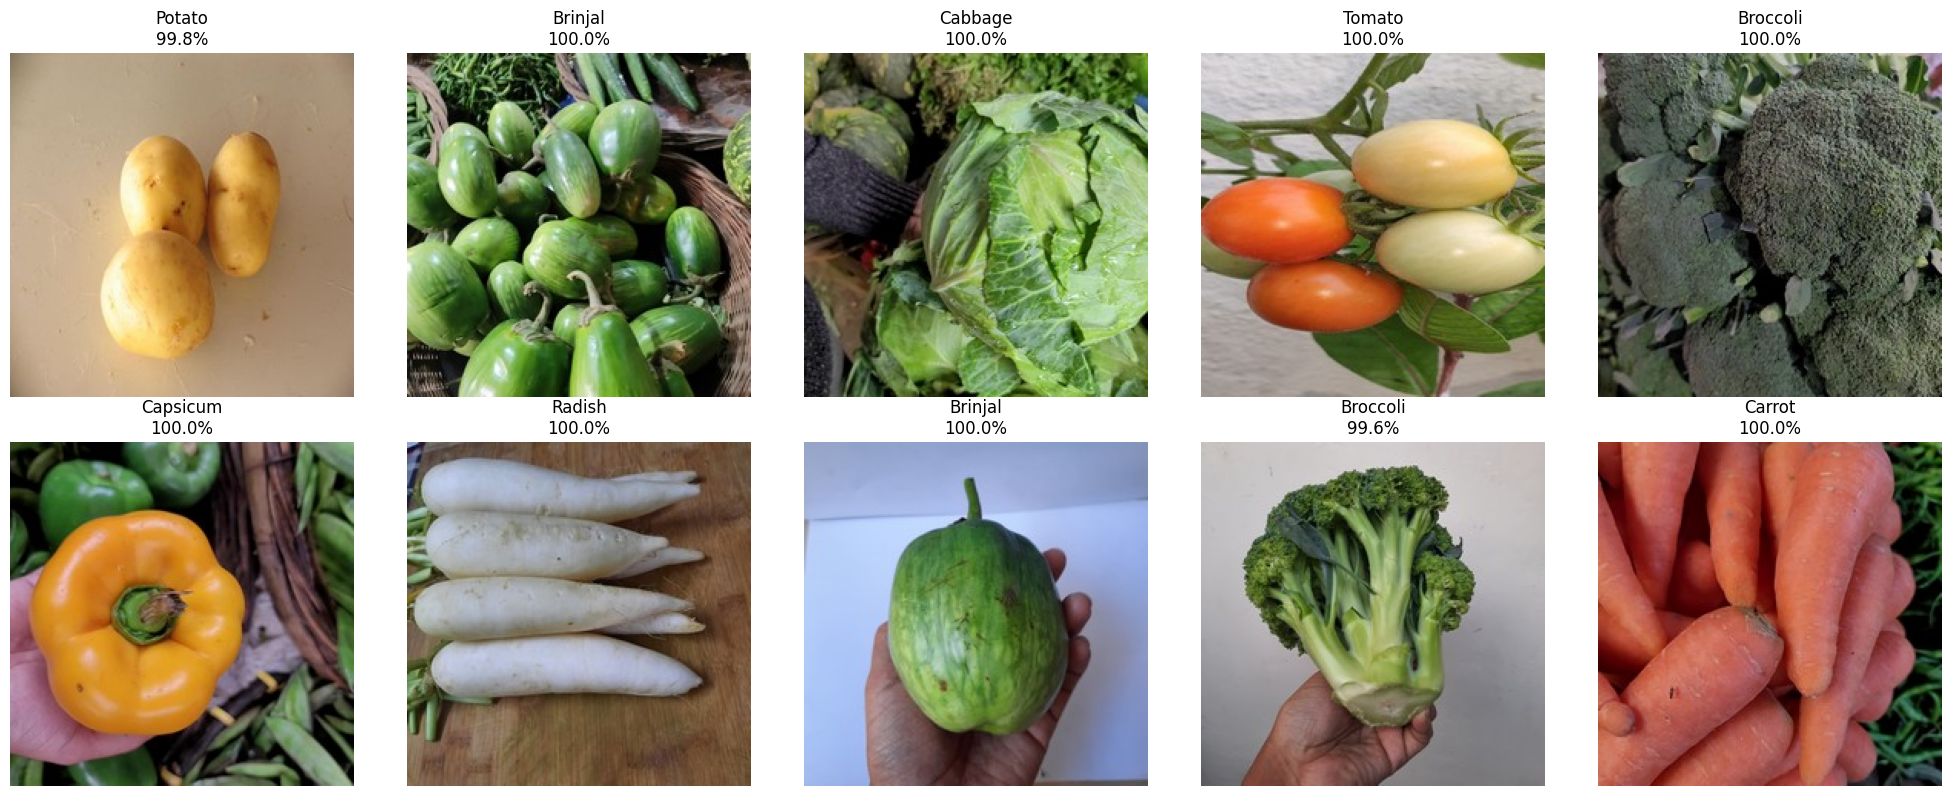

In [53]:
# Melakukan prediksi menggunakan model langsung
import os
import random
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Path ke folder gambar test
path = '/kaggle/input/vegetable-image-dataset/Vegetable Images'
image_folder = os.path.join(path, 'test')  # atau 'validation'

# Mengumpulkan semua file gambar .jpg dari folder test
all_image_files = []
for root, dirs, files in os.walk(image_folder):
    for file in files:
        if file.lower().endswith('.jpg'):
            all_image_files.append(os.path.join(root, file))

print(f"Total gambar ditemukan: {len(all_image_files)}")

if len(all_image_files) == 0:
    print("Tidak ada gambar ditemukan.")
else:
    # Memilih 10 gambar acak (atau kurang jika tidak cukup)
    num_samples = min(10, len(all_image_files))
    random_image_files = random.sample(all_image_files, num_samples)

    # Membuat plot untuk menampilkan gambar dan prediksinya
    plt.figure(figsize=(20, 8))
    for i, img_path in enumerate(random_image_files):
        # Memuat dan memproses gambar
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Melakukan prediksi
        pred = model.predict(img_array)
        predicted_class = class_names[np.argmax(pred)]

        # Menampilkan gambar dan prediksinya
        plt.subplot(2, 5, i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'{predicted_class}\n{np.max(pred)*100:.1f}%')

    plt.tight_layout()
    plt.show()

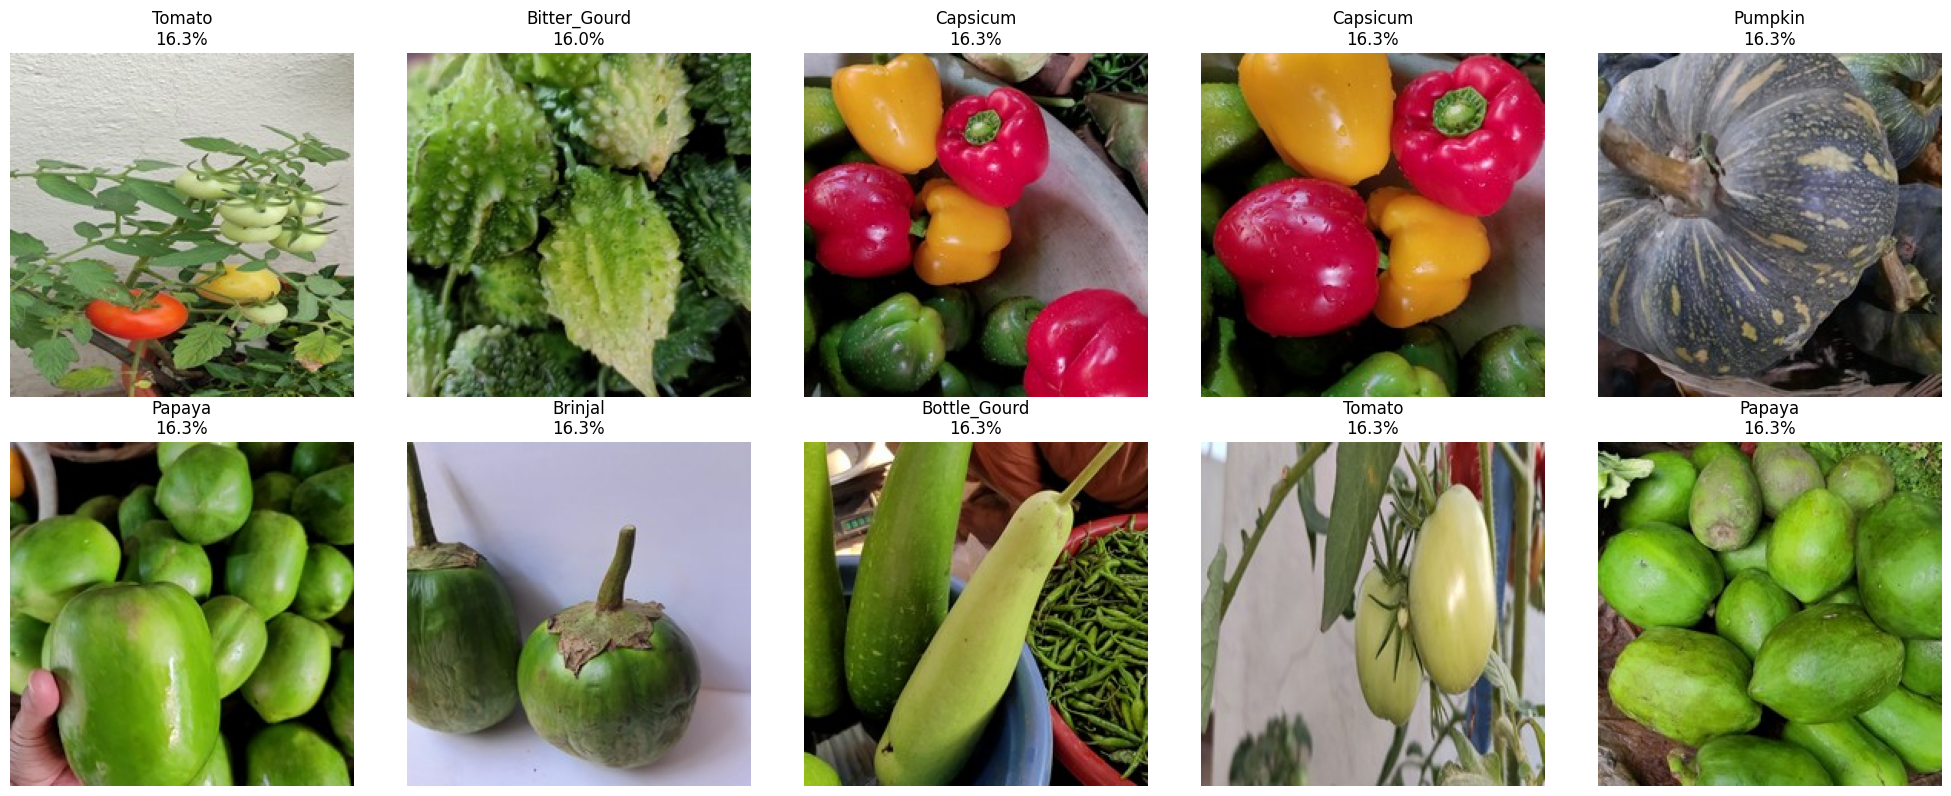


Gambar ke-1: 1197.jpg
Prediksi: Tomato
Confidence per class:
  Bean        : 5.98%
  Bitter_Gourd: 5.98%
  Bottle_Gourd: 5.98%
  Brinjal     : 5.98%
  Broccoli    : 5.98%
  Cabbage     : 5.98%
  Capsicum    : 5.98%
  Carrot      : 5.98%
  Cauliflower : 5.98%
  Cucumber    : 5.98%
  Papaya      : 5.98%
  Potato      : 5.98%
  Pumpkin     : 5.98%
  Radish      : 5.98%
  Tomato      : 16.26%

Gambar ke-2: 1230.jpg
Prediksi: Bitter_Gourd
Confidence per class:
  Bean        : 6.00%
  Bitter_Gourd: 16.03%
  Bottle_Gourd: 5.99%
  Brinjal     : 5.99%
  Broccoli    : 5.99%
  Cabbage     : 6.05%
  Capsicum    : 5.99%
  Carrot      : 5.99%
  Cauliflower : 6.02%
  Cucumber    : 5.99%
  Papaya      : 5.99%
  Potato      : 5.99%
  Pumpkin     : 5.99%
  Radish      : 5.99%
  Tomato      : 5.99%

Gambar ke-3: 1115.jpg
Prediksi: Capsicum
Confidence per class:
  Bean        : 5.98%
  Bitter_Gourd: 5.98%
  Bottle_Gourd: 5.98%
  Brinjal     : 5.98%
  Broccoli    : 5.98%
  Cabbage     : 5.98%
  Capsicum  

In [54]:
# Melakukan prediksi menggunakan model yang disimpan (SavedModel format)
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array
from keras.layers import TFSMLayer

# Memuat model yang telah disimpan
saved_model_path = 'saved_model_dir'  # ganti sesuai lokasi model kamu
reloaded_layer = TFSMLayer(saved_model_path, call_endpoint='serving_default')

# Fungsi untuk melakukan prediksi menggunakan model yang dimuat ulang
def predict_with_saved_model(img_array):
    pred_dict = reloaded_layer(img_array)
    logits = pred_dict['output_0']
    return tf.nn.softmax(logits).numpy()

# Mendapatkan nama kelas (harus urutan sama dengan saat training)
class_names = sorted(os.listdir('/kaggle/input/vegetable-image-dataset/Vegetable Images/train'))

# Path ke folder test
image_folder = '/kaggle/input/vegetable-image-dataset/Vegetable Images/test'

# Mengumpulkan semua file gambar .jpg
all_image_files = []
for root, dirs, files in os.walk(image_folder):
    for file in files:
        if file.lower().endswith('.jpg'):
            all_image_files.append(os.path.join(root, file))

# Memilih 10 gambar acak untuk diprediksi
random_image_files = random.sample(all_image_files, 10)

# Visualisasi prediksi
plt.figure(figsize=(20, 8))

for i, img_path in enumerate(random_image_files):
    # Memuat dan memproses gambar
    img = load_img(img_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Melakukan prediksi
    pred = predict_with_saved_model(img_array)
    predicted_class = class_names[np.argmax(pred)]

    # Menampilkan gambar dan prediksinya
    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'{predicted_class}\n{np.max(pred)*100:.1f}%')

plt.tight_layout()
plt.show()

# Mencetak confidence score untuk setiap kelas pada setiap gambar
for i, img_path in enumerate(random_image_files):
    img = load_img(img_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Melakukan prediksi
    pred = predict_with_saved_model(img_array)
    predicted_class = class_names[np.argmax(pred)]

    # Mencetak hasil prediksi detail
    print(f'\nGambar ke-{i+1}: {os.path.basename(img_path)}')
    print(f'Prediksi: {predicted_class}')
    print("Confidence per class:")
    for j, label in enumerate(class_names):
        print(f"  {label:12s}: {pred[0][j]*100:.2f}%")

In [51]:
!pip freeze > requirements.txt
print("requirements.txt generated!")

requirements.txt generated!
